In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (257)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (275)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (396)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (313)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (168)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (386)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (543)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (152)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (200)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (204)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (142)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (593)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (141)_iaip.jpg
/kaggle/input/diseasecott

/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (206)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (387)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (326)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (416)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (258)_iaip(1).jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (272)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (265)_iaip(1).jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (516)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (611)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (379)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (550)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (551)_iaip.jpg
/kaggle/input/diseasecotton/data/train/fresh cotton plant/dsd (267)_ia

/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (599)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (793)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (892)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (155)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (19)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (530)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (598)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (577)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (376)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (696)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (244)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (461)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotto

In [3]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('the gpu available {}'.format(tf.test.gpu_device_name()))
else:
    print('no gpu')

the gpu available /device:GPU:0


In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
tf.__version__

'2.4.1'

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.InceptionV3 import InceptionV3
from keras import applications

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
IMAGE_SIZE_resnet50 = [224, 224]
# IMAGE_SIZE_VGG16 = [299, 299]


train_path = '/kaggle/input/diseasecotton/data/train'
test_path = '/kaggle/input/diseasecotton/data/test'
valid_path = '/kaggle/input/diseasecotton/data/val'

In [9]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE_resnet50+[3], weights = 'imagenet', include_top = False)
# applications.InceptionV3

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [11]:
for layer in vgg16.layers:
    layer.trainable = False



In [12]:
folders = glob('/kaggle/input/diseasecotton/data/train/*')
folders

['/kaggle/input/diseasecotton/data/train/fresh cotton plant',
 '/kaggle/input/diseasecotton/data/train/fresh cotton leaf',
 '/kaggle/input/diseasecotton/data/train/diseased cotton plant',
 '/kaggle/input/diseasecotton/data/train/diseased cotton leaf']

In [13]:
x = Flatten()(resnet50.output)


In [14]:
prediction = Dense(len(folders), activation = 'softmax')(x)


model_resnet50 = Model(inputs=resnet50.input, outputs=prediction)


In [15]:
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
model_resnet50.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale= 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/train',
                                                target_size = (224, 224),
                                                batch_size= 32,
                                                class_mode = 'categorical')

# training_set = train_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/train',
#                                                 target_size = (299, 299),
#                                                 batch_size= 32,
#                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/test',
                                                target_size = (224, 224),
                                                batch_size= 32,
                                                class_mode = 'categorical')

# test_set = test_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/test',
#                                                 target_size = (299, 299),
#                                                 batch_size= 32,
#                                                 class_mode = 'categorical')

Found 36 images belonging to 5 classes.


In [20]:
valid_set = valid_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/val',
                                                target_size = (224, 224),
                                                batch_size= 32,
                                                class_mode = 'categorical')

# valid_set = valid_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/val',
#                                                 target_size = (299, 299),
#                                                 batch_size= 32,
#                                                 class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [21]:
r = model_resnet50.fit_generator(
                                training_set, validation_data = valid_set,
                                epochs = 35,
                                steps_per_epoch = len(training_set),
                                validation_steps = len(valid_set))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
61/61 [==============================] - 57s 843ms/step - loss: 4.0299 - accuracy: 0.3079 - val_loss: 1.6145 - val_accuracy: 0.3241
Epoch 2/35
61/61 [==============================] - 35s 568ms/step - loss: 1.2100 - accuracy: 0.5073 - val_loss: 0.8063 - val_accuracy: 0.6728
Epoch 3/35
61/61 [==============================] - 34s 560ms/step - loss: 0.9120 - accuracy: 0.6412 - val_loss: 0.9339 - val_accuracy: 0.5895
Epoch 4/35
61/61 [==============================] - 35s 571ms/step - loss: 0.8764 - accuracy: 0.6525 - val_loss: 0.8159 - val_accuracy: 0.6451
Epoch 5/35
61/61 [==============================] - 34s 561ms/step - loss: 0.8257 - accuracy: 0.6494 - val_loss: 0.6314 - val_accuracy: 0.7531
Epoch 6/35
61/61 [==============================] - 34s 561ms/step - loss: 0.8306 - accuracy: 0.6704 - val_loss: 0.7088 - val_accuracy: 0.7037
Epoch 7/35
61/61 [==============================] - 34s 565ms/step - loss: 0.8208 - accuracy: 0.6778 - val_loss: 0.6309 - val_accuracy: 0.7438

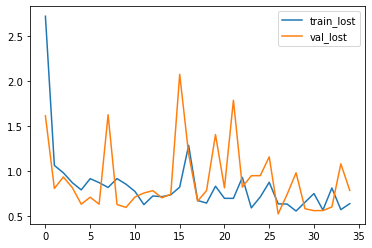

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'train_lost')
plt.plot(r.history['val_loss'], label = 'val_lost')
plt.legend()
plt.show()


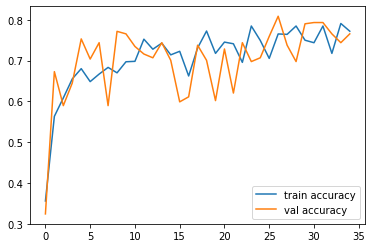

In [23]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()


In [24]:
model_resnet50.save('model_resnet50.h5')

In [25]:
y_pred = model_resnet50.predict(valid_set)

In [26]:
y_pred

array([[5.9734324e-05, 9.5837474e-01, 1.6676677e-04, 4.1398704e-02],
       [9.6049017e-01, 3.8470727e-05, 3.8343854e-02, 1.1275630e-03],
       [7.0990591e-06, 3.3554552e-05, 9.9995768e-01, 1.6112298e-06],
       ...,
       [1.5543329e-03, 8.7050688e-01, 2.8795720e-04, 1.2765083e-01],
       [7.0820475e-05, 7.6258123e-01, 1.7834006e-01, 5.9007846e-02],
       [4.6618798e-01, 2.6116082e-01, 2.1811441e-01, 5.4536782e-02]],
      dtype=float32)

In [27]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 2, 3, 3,
       2, 1, 2, 1, 3, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 1,
       2, 3, 2, 1, 2, 1, 2, 3, 2, 2, 2, 3, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 0, 0, 1, 3, 1, 0, 1, 2, 3, 1, 1, 0, 3, 2, 1, 2, 0, 1, 2, 3, 2,
       1, 1, 2, 2, 2, 1, 0, 2, 1, 3, 1, 3, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 2, 3, 2, 2, 3, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 3, 2, 2, 0, 1, 2, 2, 3, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 1,
       1, 2, 0, 1, 2, 3, 1, 0, 1, 1, 1, 0, 3, 1, 2, 3, 3, 3, 1, 1, 2, 1,
       2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 3, 2,
       3, 1, 2, 2, 2, 2, 2, 3, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 3, 3, 1, 0,
       2, 1, 3, 0, 3, 2, 3, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 3, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 3, 2, 2, 1, 3, 2, 1, 2, 1,

In [ ]:
# /kaggle/input/diseasecotton/data/test/diseased cotton plant/dd (706).jpg
# /kaggle/input/diseasecotton/data/test/diseased cotton leaf/dis_leaf (248).jpg
# /kaggle/input/diseasecotton/data/test/diseased cotton leaf/dis_leaf (124).jpg
# /kaggle/input/diseasecotton/data/test/diseased cotton leaf/dis_leaf (322).jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (600)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dis_leaf (124)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dis_leaf (248)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (223)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (367)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (328)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dis_leaf (322)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (228)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (341)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (384)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (366)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (513)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (632)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (41)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (706)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (405)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (378)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (396)_compressed.jpg
test = load_img('/kaggle/input/diseasecotton/data/test/test data comp files/dsd (632)_compressed.jpg', target_size = (224,224))

test_img = image.img_to_array(test)
test_img = test_img / 255
test_img = np.expand_dims(test_img, axis=0)
result = model_resnet50.predict(test_img)

a = np.argmax(model_resnet50.predict(test_img), axis=1)

if a == 0:
    print('diseased cotton leaf')
elif a == 1:
    print('diseased cotton plant')
elif a == 2:
    print('fresh cotton leaf')
else:
    print('fresh cotton plant')

fresh cotton plant
